In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from keras.backend import set_session
from collections import Counter
import warnings,sys,os,time
warnings.filterwarnings('ignore')

In [ ]:
print("Tensorflow version: {}".format(tf.__version__))
print("Python: {}".format(sys.version))
print("keras version: {}".format(keras.__version__)); del keras

Tensorflow version: 2.12.0
Python: 3.10.6 (main, May 29 2023, 11:10:38) [GCC 11.3.0]
keras version: 2.12.0


In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.95 #Using 95% of the available memory of the GPU
config.gpu_options.visible_device_list = "0"
set_session(tf.compat.v1.Session(config=config))

In [ ]:
from  numpy.random import seed
import random as rn

def set_seed(sd=144):
    seed(sd)
    rn.seed(sd)
    tf.random.set_seed(sd)


In [ ]:
Flickr_jpg = '/content/drive/MyDrive/Data/Flickr8k_images'
Flickr_text = '/content/drive/MyDrive/Data/Flickr8k_text/captions.txt'
jpgs = os.listdir(Flickr_jpg)
print('No. of images: ', len(jpgs))

No. of images:  8092


In [ ]:
file = open(Flickr_text,'r', encoding='utf8')
text= file.read()
file.close()

In [ ]:
datatxt=[]
i =0
for line in text.split('\n'):
    # print('LINE: ',line)
    col = line.split(',')
    # print('COL:  ',col)
    # print('COL[0]:  ',col[0])

    # if i==5:
        # break
    if len(col)==1:
        continue
    w=col[0].split("#")
    # print('W ',w)
    # print(' ')
    # print('COL[1]',col[1].lower())
    x = i%5
    i+=1
    datatxt.append(w+[x]+[col[1].lower()])
print(datatxt[:2])
    # print( )

df_txt = pd.DataFrame(datatxt,columns=['filename','index','caption'])

uni_filename = np.unique(df_txt.filename.values)
print()
print('Number of unique filenames : {}'.format(len(uni_filename)))
print('Number fo captions for each image:')
Counter(Counter(df_txt.filename.values).values())
# df_txt = df_txt.drop(0)
print(df_txt[0:5])


[['1000268201_693b08cb0e.jpg', 0, 'a child in a pink dress is climbing up a set of stairs in an entry way .'], ['1000268201_693b08cb0e.jpg', 1, 'a girl going into a wooden building .']]

Number of unique filenames : 8091
Number fo captions for each image:
                    filename  index  \
0  1000268201_693b08cb0e.jpg      0   
1  1000268201_693b08cb0e.jpg      1   
2  1000268201_693b08cb0e.jpg      2   
3  1000268201_693b08cb0e.jpg      3   
4  1000268201_693b08cb0e.jpg      4   

                                             caption  
0  a child in a pink dress is climbing up a set o...  
1              a girl going into a wooden building .  
2   a little girl climbing into a wooden playhouse .  
3  a little girl climbing the stairs to her playh...  
4  a little girl in a pink dress going into a woo...  


# Plotting

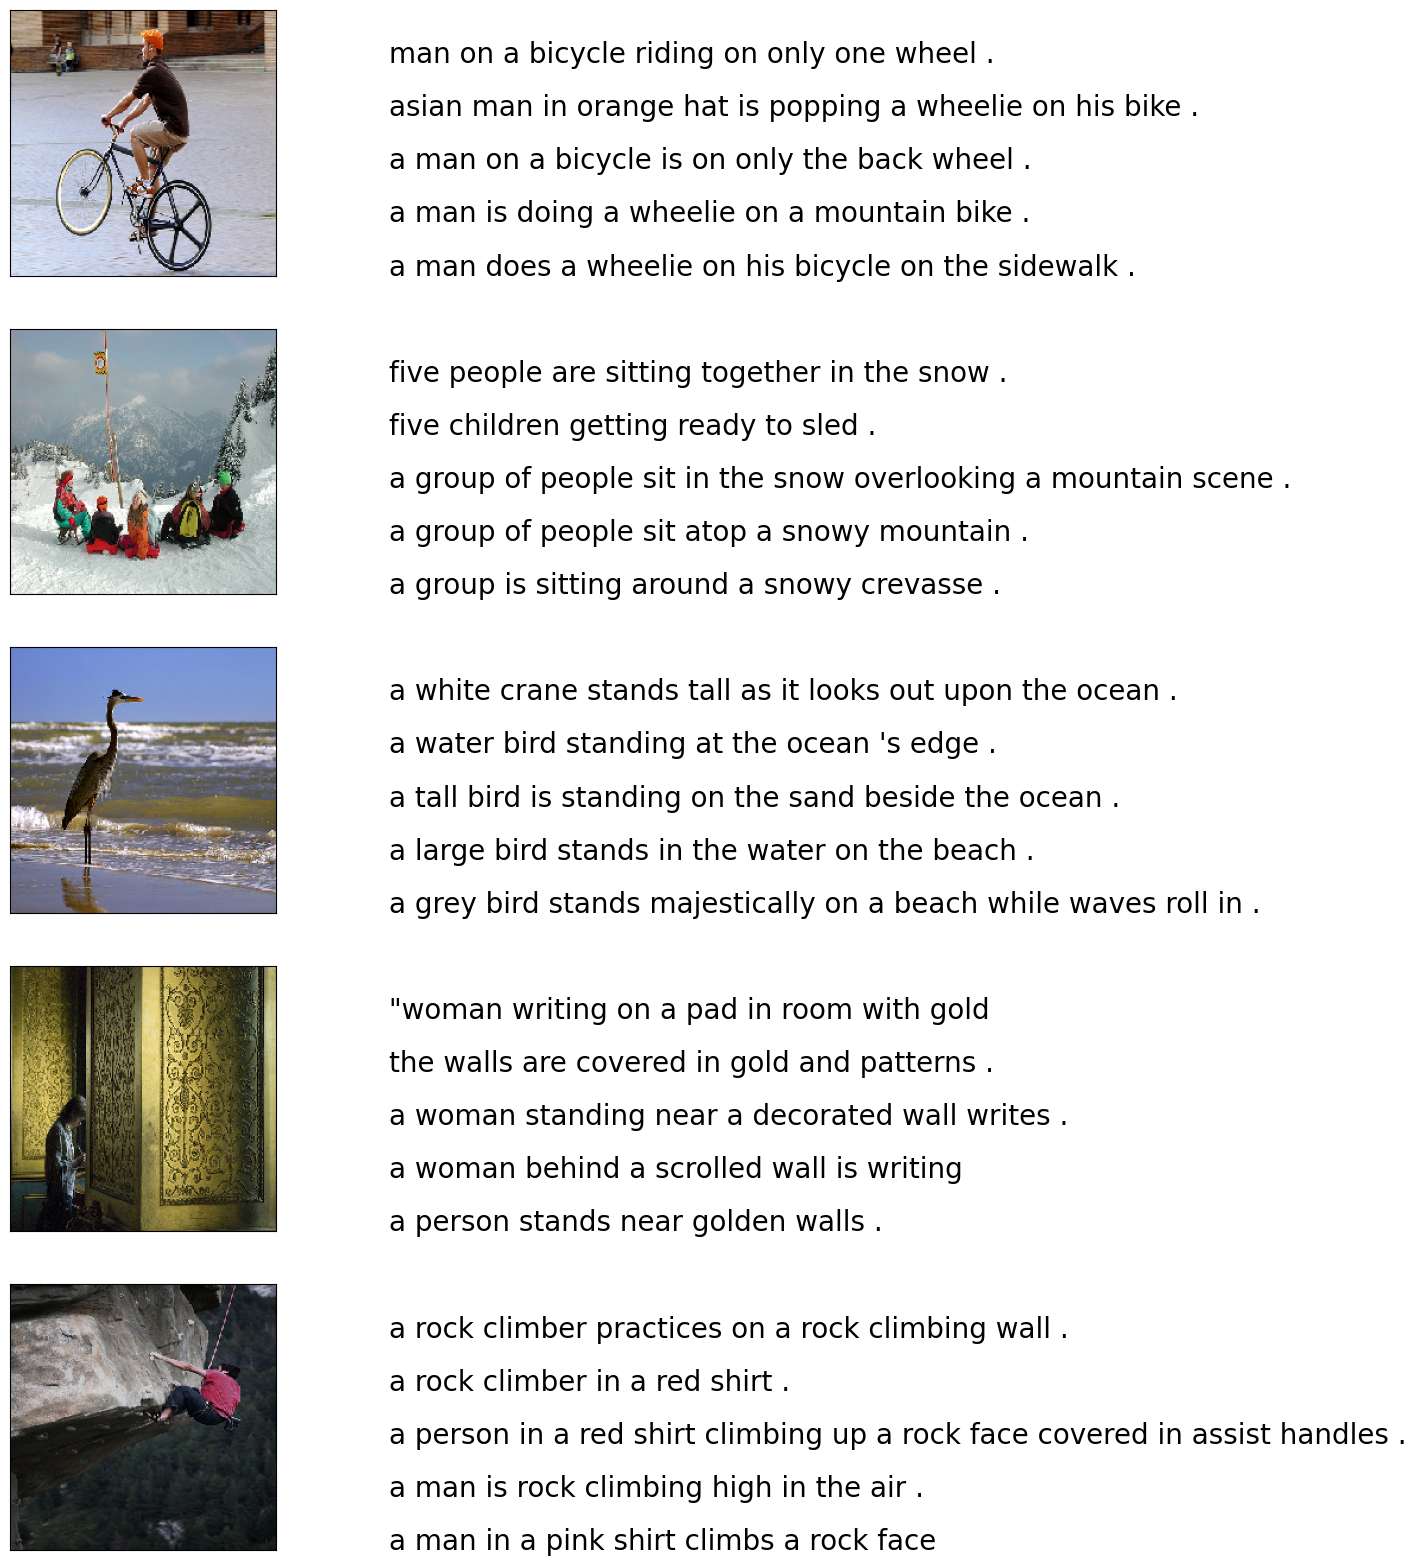

In [ ]:
from tensorflow.keras.utils import load_img
from IPython.display import display
from PIL import Image

npic=5
npix =224
target_size= (npix,npix,3)

count=1
fig = plt.figure(figsize=(10,20))
for jpgfnm in uni_filename[-5:]:
    filename = Flickr_jpg+'/'+jpgfnm
    captions = list(df_txt['caption'].loc[df_txt["filename"]==jpgfnm].values)
    image_load = load_img(filename, target_size = target_size)

    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count+=1

    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0, len(captions))
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=20)
    count+=1
plt.show()


In [ ]:
def df_word(df_text):
    vocabulary=[]
    for txt in df_txt.caption.values:
        vocabulary.extend(txt.split())
    print('Vocabulary Size: %d' % len(set(vocabulary)))
    ct = Counter(vocabulary)
    dfword = pd.DataFrame({'word':list(ct.keys()),'count':list(ct.values())})
    dfword = dfword.sort_values("count", ascending=False)
    dfword = dfword.reset_index()[["word","count"]]
    return(dfword)
dfword = df_word(df_txt)
dfword.head(3)

Vocabulary Size: 8871


word  count
0    a  60196
1    .  34205
2   in  18174

In [ ]:
dfword.tail()

word  count
8866  abarrotes      1
8867    brought      1
8868   wetsuite      1
8869    steeple      1
8870   patterns      1

# Cleaning the captions

In [ ]:
import string
text_original = "I ate 1000 apples and a banana. I have python v2.7. It's 2:30 pm. Could you buy me iphone7?"
print(text_original)

I ate 1000 apples and a banana. I have python v2.7. It's 2:30 pm. Could you buy me iphone7?


In [ ]:
def remove_punctuation(text_original):
    text_no_punctuation = text_original.translate(str.maketrans('','',string.punctuation))
    return(text_no_punctuation)

text_no_punctuation = remove_punctuation(text_original)
print('Removed Punctuations: ',text_no_punctuation)
print()
def remove_single_character(text):
    text_len_more_than1 =""
    for word in text.split():
        if len(word)>1:
            text_len_more_than1 += " "+word

    return(text_len_more_than1)
text_len_more_than1 = remove_single_character(text_no_punctuation)
print('Removed a single character word:',text_len_more_than1)
print()

def remove_numeric(text):
    text_no_numeric =""
    for word in text.split():
        isalpha = word.isalpha()
        if isalpha:
            text_no_numeric+=" "+word
    return(text_no_numeric)
text_no_numeric = remove_numeric(text_len_more_than1)
print('Removed numeric values: ', text_no_numeric)

Removed Punctuations:  I ate 1000 apples and a banana I have python v27 Its 230 pm Could you buy me iphone7

Removed a single character word:  ate 1000 apples and banana have python v27 Its 230 pm Could you buy me iphone7

Removed numeric values:   ate apples and banana have python Its pm Could you buy me


In [ ]:
def text_clean(text_original):
    text = remove_punctuation(text_original)
    text = remove_single_character(text)
    text = remove_numeric(text)
    return(text)
for i, caption in enumerate(df_txt.caption.values):
    # print(i)
    newcaption = text_clean(caption)
    df_txt['caption'].iloc[i] = newcaption

In [ ]:
df_txt

filename  index  \
0      1000268201_693b08cb0e.jpg      0   
1      1000268201_693b08cb0e.jpg      1   
2      1000268201_693b08cb0e.jpg      2   
3      1000268201_693b08cb0e.jpg      3   
4      1000268201_693b08cb0e.jpg      4   
...                          ...    ...   
40450   997722733_0cb5439472.jpg      0   
40451   997722733_0cb5439472.jpg      1   
40452   997722733_0cb5439472.jpg      2   
40453   997722733_0cb5439472.jpg      3   
40454   997722733_0cb5439472.jpg      4   

                                                 caption  
0       child in pink dress is climbing up set of sta...  
1                        girl going into wooden building  
2             little girl climbing into wooden playhouse  
3       little girl climbing the stairs to her playhouse  
4       little girl in pink dress going into wooden c...  
...                                                  ...  
40450                 man in pink shirt climbs rock face  
40451               man is rock climbing high in the air  
40452   person in red shirt climbing up rock face cov...  
40453                          rock climber in red shirt  
40454       rock climber practices on rock climbing wall  

[40455 rows x 3 columns]

# Plotting top 50 words thaat appears in the cleaned dataset

Vocabulary Size: 8571


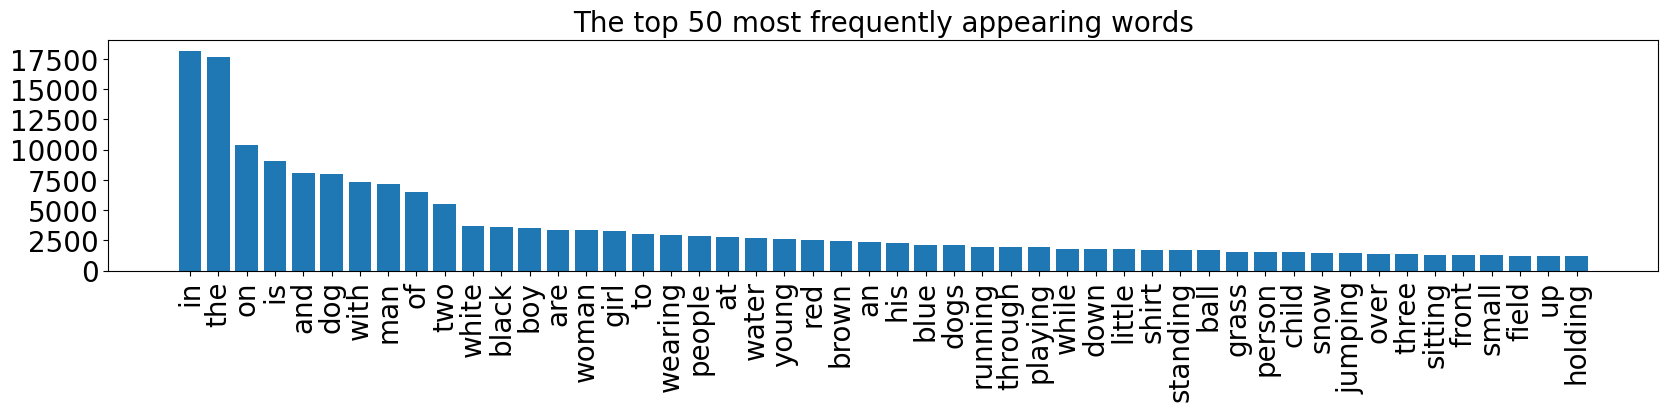

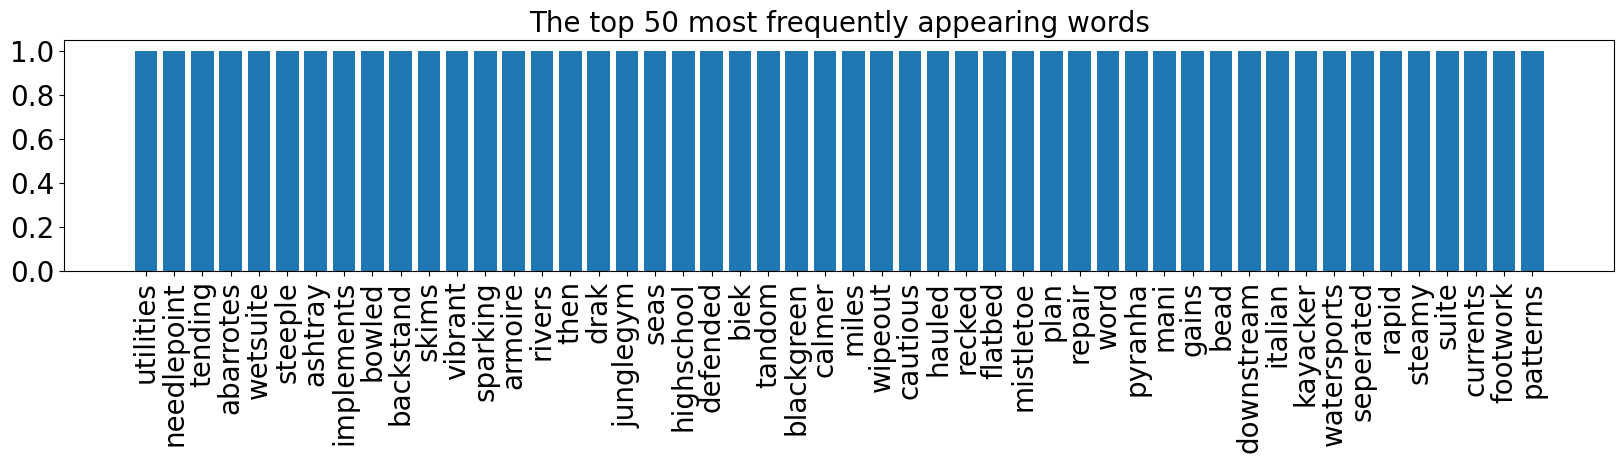

In [ ]:
x = 50

def plthist(dfsub,title="The top 50 most frequently appearing words"):
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index,dfsub['count'])
    plt.yticks(fontsize=20)
    plt.xticks(dfsub.index,dfsub['word'],rotation=90,fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()

dfword = df_word(df_txt)
plthist(dfword.iloc[:x,:],title="The top 50 most frequently appearing words")
plthist(dfword.iloc[-x:,:],title="The top 50 most frequently appearing words")

# Adding start and end sequence tokens for captions

In [ ]:
from copy import copy

def add_tokens(caption):
    caps=[]
    for text in caption:
        text = 'startseq'+text+'endseq'
        caps.append(text)
    return(caps)

df_txt0 = copy(df_txt)
df_txt0['caption'] = add_tokens(df_txt["caption"])
df_txt0.head(5)


filename  index  \
0  1000268201_693b08cb0e.jpg      0   
1  1000268201_693b08cb0e.jpg      1   
2  1000268201_693b08cb0e.jpg      2   
3  1000268201_693b08cb0e.jpg      3   
4  1000268201_693b08cb0e.jpg      4   

                                             caption  
0  startseq child in pink dress is climbing up se...  
1     startseq girl going into wooden buildingendseq  
2  startseq little girl climbing into wooden play...  
3  startseq little girl climbing the stairs to he...  
4  startseq little girl in pink dress going into ...

In [ ]:
del df_txt

# Loading VGG16 model and weights

VGG-16 is used to extract features from the images

In [ ]:
from keras.applications import VGG16
modelvgg = VGG16(include_top =True,weights=None)
modelvgg.load_weights('/content/drive/MyDrive/vgg16_weights_tf_dim_ordering_tf_kernels.h5')
modelvgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import models
# print(modelvgg.layers[-1])
modelvgg = models.Model(inputs=modelvgg.inputs, outputs=modelvgg.layers[-2].output)
## show the deep learning model
modelvgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Feature extraction

VGG-16 model gives out 4096 features from the input image of size 224 * 224

In [ ]:
from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict
from tensorflow.keras.utils import load_img,img_to_array

In [ ]:
images = OrderedDict()
npix = 224
target_size = (npix,npix,3)
data = np.zeros((len(jpgs),npix,npix,3))
jpgs = [name for name in os.listdir(Flickr_jpg) if os.path.isfile(os.path.join(Flickr_jpg, name))]
for i,name in enumerate(jpgs):

    filename = os.path.join(Flickr_jpg, name)
    image = load_img(filename,target_size = target_size)

    image = img_to_array(image)
    nimage= preprocess_input(image)

    y_pred = modelvgg.predict(nimage.reshape((1,)+nimage.shape[:3]))
    images[name] = y_pred.flatten()


In [ ]:
# images

In [ ]:
from sklearn.decomposition import PCA
image_arrays = list(images.values())

encoder = np.stack(image_arrays)
pca = PCA(n_components=2)
y_pca = pca.fit_transform(encoder)

In [ ]:
picked_pic  = OrderedDict()
picked_pic["red"]     = [7163,3351,7985,3213]
picked_pic["green"]   = [4250,1348,7472]
picked_pic["magenta"] = [4981,3913,3813,3150]
picked_pic["blue"]    = [6615,1865,6907]
picked_pic["yellow"]  = [3908,3160,2831]
picked_pic["purple"]  = [6671,1936,983]

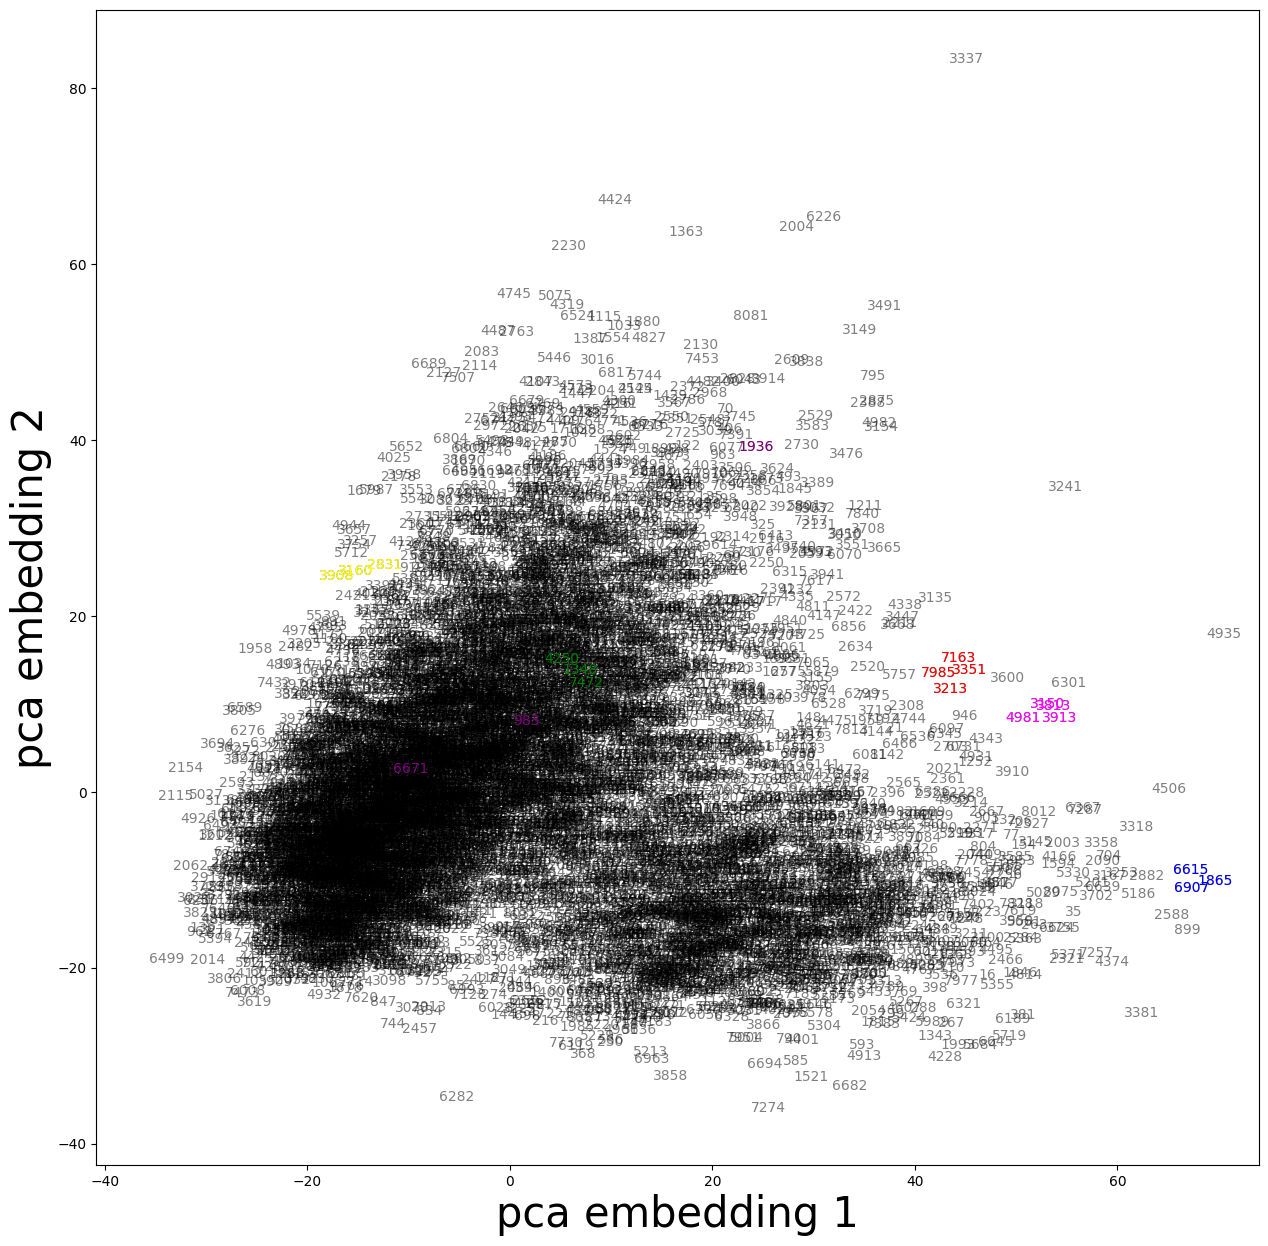

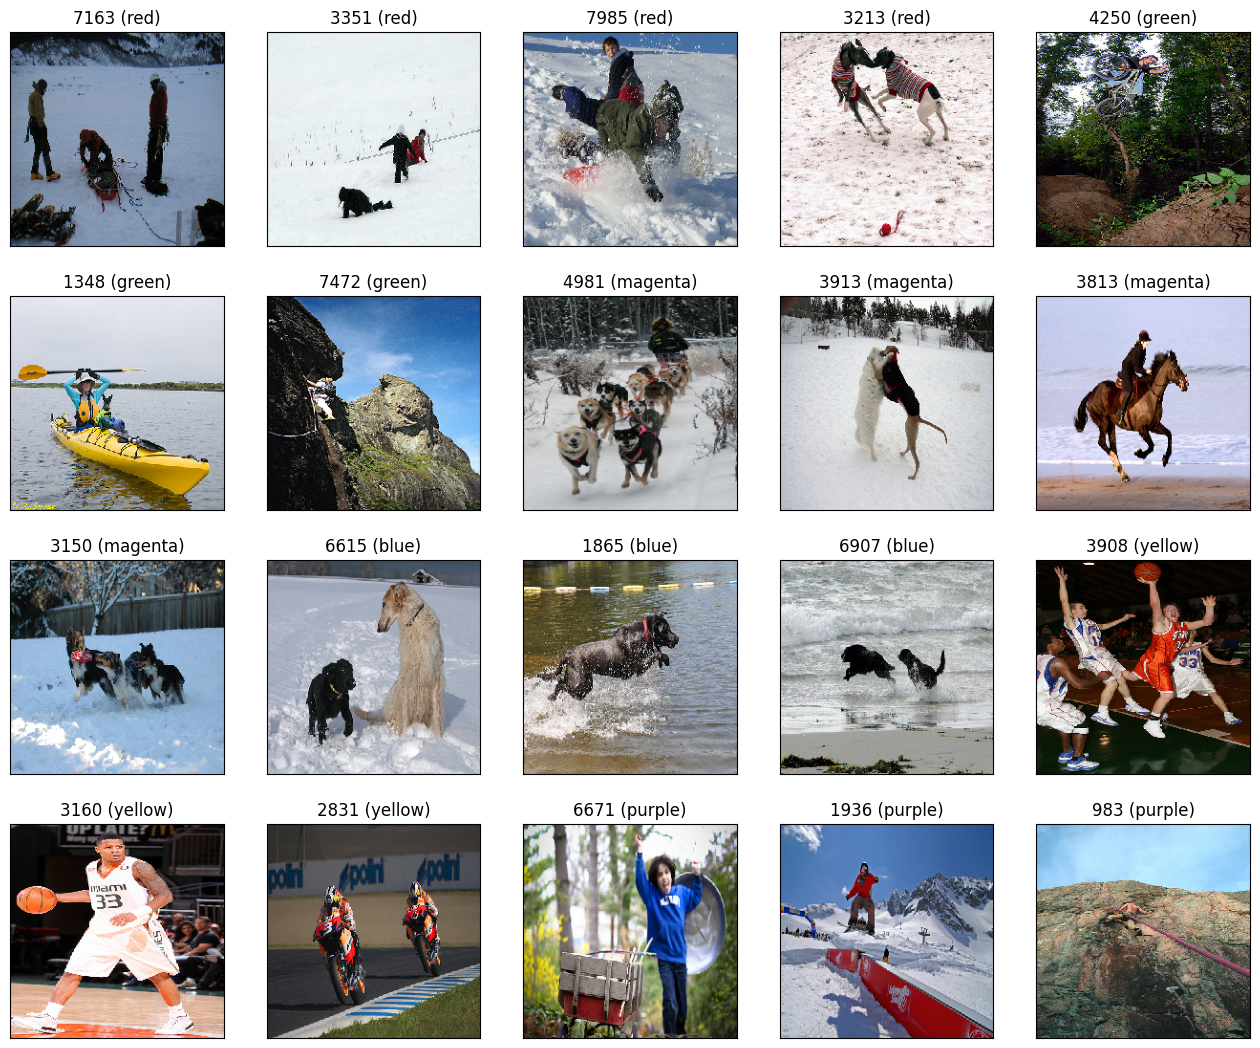

In [ ]:
fig,ax= plt.subplots(figsize = (15,15))
ax.scatter(y_pca[:,0],y_pca[:,1],c='white')

for irow in range(y_pca.shape[0]):
    ax.annotate(irow,y_pca[irow,:], color='black',alpha=0.5)

for color, irows in picked_pic.items():
    for irow in irows:
        ax.annotate(irow,y_pca[irow,:],color=color)

ax.set_xlabel("pca embedding 1",fontsize=30)
ax.set_ylabel("pca embedding 2",fontsize=30)
plt.show()

fig = plt.figure(figsize=(16,20))
count= 1
for color,irows in picked_pic.items():
    for ivec in irows:
        name = jpgs[ivec]
        filename = Flickr_jpg + '/' + name
        image = load_img(filename, target_size=target_size)

        ax = fig.add_subplot(len(picked_pic),5,count,
                         xticks=[],yticks=[])
        count += 1
        plt.imshow(image)
        plt.title("{} ({})".format(ivec,color))
plt.show()

# Merging the images and captions for training

In [ ]:
dimages,keepindex=[],[]

df_txt0 = df_txt0.loc[df_txt0['index'].values==0,: ]
for i,fnm in enumerate(df_txt0.filename):
    if fnm in images.keys():
        dimages.append(images[fnm])
        keepindex.append(i)


fnames = df_txt0['filename'].iloc[keepindex].values
dcaptions = df_txt0['caption'].iloc[keepindex].values
dimages = np.array(dimages)

In [ ]:
df_txt0

filename  index  \
0      1000268201_693b08cb0e.jpg      0   
5      1001773457_577c3a7d70.jpg      0   
10     1002674143_1b742ab4b8.jpg      0   
15     1003163366_44323f5815.jpg      0   
20     1007129816_e794419615.jpg      0   
...                          ...    ...   
40430   990890291_afc72be141.jpg      0   
40435    99171998_7cc800ceef.jpg      0   
40440    99679241_adc853a5c0.jpg      0   
40445   997338199_7343367d7f.jpg      0   
40450   997722733_0cb5439472.jpg      0   

                                                 caption  
0      startseq child in pink dress is climbing up se...  
5      startseq black dog and spotted dog are fightin...  
10     startseq little girl covered in paint sits in ...  
15     startseq man lays on bench while his dog sits ...  
20     startseq man in an orange hat starring at some...  
...                                                  ...  
40430  startseq man does wheelie on his bicycle on th...  
40435  startseq group is sitting around snowy crevass...  
40440  startseq grey bird stands majestically on beac...  
40445     startseq person stands near golden wallsendseq  
40450  startseq man in pink shirt climbs rock faceendseq  

[8091 rows x 3 columns]

In [ ]:
df_txt0[:5]

filename  index  \
0   1000268201_693b08cb0e.jpg      0   
5   1001773457_577c3a7d70.jpg      0   
10  1002674143_1b742ab4b8.jpg      0   
15  1003163366_44323f5815.jpg      0   
20  1007129816_e794419615.jpg      0   

                                              caption  
0   startseq child in pink dress is climbing up se...  
5   startseq black dog and spotted dog are fightin...  
10  startseq little girl covered in paint sits in ...  
15  startseq man lays on bench while his dog sits ...  
20  startseq man in an orange hat starring at some...

## Tokenizing the captions

In [ ]:
dcaptions

array(['startseq child in pink dress is climbing up set of stairs in an entry wayendseq',
       'startseq black dog and spotted dog are fightingendseq',
       'startseq little girl covered in paint sits in front of painted rainbow with her hands in bowlendseq',
       ...,
       'startseq grey bird stands majestically on beach while waves roll inendseq',
       'startseq person stands near golden wallsendseq',
       'startseq man in pink shirt climbs rock faceendseq'], dtype=object)

In [ ]:
fnames

array(['1000268201_693b08cb0e.jpg', '1001773457_577c3a7d70.jpg',
       '1002674143_1b742ab4b8.jpg', ..., '99679241_adc853a5c0.jpg',
       '997338199_7343367d7f.jpg', '997722733_0cb5439472.jpg'],
      dtype=object)

In [ ]:
dimages[0]

array([2.5076475, 0.       , 0.       , ..., 0.       , 0.       ,
       0.       ], dtype=float32)

In [ ]:
from keras.preprocessing.text import Tokenizer

nb_words = 8000
tokenizer = Tokenizer(nb_words)
tokenizer.fit_on_texts(dcaptions)
vocab_size = len(tokenizer.word_index)+1
print('Vocabulary size : {}'.format(vocab_size))
dtexts = tokenizer.texts_to_sequences(dcaptions)
print(dtexts[:5])

Vocabulary size : 5423
[[1, 35, 2, 64, 136, 5, 122, 51, 517, 8, 758, 2, 22, 2703, 1569], [1, 11, 7, 6, 759, 7, 16, 1324], [1, 41, 13, 158, 2, 647, 90, 2, 39, 8, 580, 1570, 10, 61, 260, 2, 1953], [1, 9, 615, 4, 217, 26, 21, 7, 90, 46, 142], [1, 9, 2, 22, 73, 102, 1325, 18, 648]]


## Splitting the training and test data

In [ ]:
prop_test,prop_val=0.2,0.2

N = len(dtexts)
Ntest,Nval = int(N*prop_test), int(N*prop_val)

def split_test_val_train(dtexts,Ntest,Nval):
    return (dtexts[:Ntest],
            dtexts[Ntest:Ntest+Nval],
            dtexts[Ntest+Nval:])

dt_test,dt_val,dt_train = split_test_val_train(dtexts,Ntest,Nval)
di_test,  di_val, di_train   = split_test_val_train(dimages,Ntest,Nval)
fnm_test,fnm_val, fnm_train  = split_test_val_train(fnames,Ntest,Nval)

In [ ]:
maxLen = np.max([len(text) for text in dtexts])
print(maxLen)
# print(type(dtexts))

28


## Processing the captions and image

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

def preprocessing(dtexts,dimages):
    N=len(dtexts)
    print("# captions/images = {}".format(N))

    assert(N==len(dimages))
    Xtext,Ximage,ytext =[],[],[]
    for text,image in zip(dtexts,dimages):
        for i in range(1, len(text)):
            in_text, out_text = text[:i], text[i]
            in_text = pad_sequences([in_text],maxlen=maxLen).flatten()
            out_text = to_categorical(out_text,num_classes = vocab_size)

            Xtext.append(in_text)
            Ximage.append(image)
            ytext.append(out_text)

    Xtext  = np.array(Xtext)
    Ximage = np.array(Ximage)
    ytext  = np.array(ytext)
    # print(Xtext.shape)
    print(" {} {} {}".format(Xtext.shape,Ximage.shape,ytext.shape))
    return(Xtext,Ximage,ytext)
Xtext_train, Ximage_train, ytext_train = preprocessing(dt_train,di_train)
Xtext_val,   Ximage_val,   ytext_val   = preprocessing(dt_val,di_val)

# captions/images = 4855
 (43008, 28) (43008, 4096) (43008, 5423)
# captions/images = 1618
 (14177, 28) (14177, 4096) (14177, 5423)


# Building the LSTM model

In [ ]:
from keras import layers
from keras.layers import Input,Flatten,Dropout,Activation
from keras.layers import LeakyReLU, PReLU

print(vocab_size)

dim_embedding = 64

input_image = layers.Input(shape=(Ximage_train.shape[1],))
fimage = layers.Dense(256,activation= 'relu',name="ImageFeature")(input_image)

input_txt = layers.Input(shape=(maxLen,))
ftxt = layers.Embedding(vocab_size, dim_embedding, mask_zero=True)(input_txt)
ftxt = layers.LSTM(256,name="CaptionFeature",return_sequences=True)(ftxt)

se2 = Dropout(0.04)(ftxt)
ftxt = layers.LSTM(256,name="CaptionFeature2")(se2)

decoder = layers.add([ftxt,fimage])
decoder = layers.Dense(256,activation='relu')(decoder)
output = layers.Dense(vocab_size, activation='softmax')(decoder)
model = models.Model(inputs=[input_image,input_txt],outputs=output)


5423


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam')
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 28, 64)       347072      ['input_3[0][0]']                
                                                                                                  
 CaptionFeature (LSTM)          (None, 28, 256)      328704      ['embedding[0][0]']              
                                                                                                  
 dropout (Dropout)              (None, 28, 256)      0           ['CaptionFeature[0][0]']         
                                                                                            

In [ ]:
print(Ximage_train.shape)
print(Xtext_train.shape)
print(ytext_train.shape)

print(Ximage_val.shape)
print(Xtext_val.shape)
print(ytext_val.shape)


(43008, 4096)
(43008, 28)
(43008, 5423)
(14177, 4096)
(14177, 28)
(14177, 5423)


# Training LSTM Model

In [ ]:
from time import time
from keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

hist = model.fit([Ximage_train,Xtext_train],ytext_train,epochs=6,verbose=2,
                 batch_size=32,validation_data=([Ximage_val,Xtext_val],ytext_val),callbacks=[tensorboard])


Epoch 1/6
1344/1344 - 129s - loss: 5.8712 - val_loss: 5.4536 - 129s/epoch - 96ms/step
Epoch 2/6
1344/1344 - 105s - loss: 4.9994 - val_loss: 5.1123 - 105s/epoch - 78ms/step
Epoch 3/6
1344/1344 - 101s - loss: 4.5357 - val_loss: 5.0526 - 101s/epoch - 75ms/step
Epoch 4/6
1344/1344 - 105s - loss: 4.2509 - val_loss: 5.0605 - 105s/epoch - 78ms/step
Epoch 5/6
1344/1344 - 102s - loss: 4.0305 - val_loss: 5.1863 - 102s/epoch - 76ms/step
Epoch 6/6
1344/1344 - 104s - loss: 3.8398 - val_loss: 5.3061 - 104s/epoch - 77ms/step


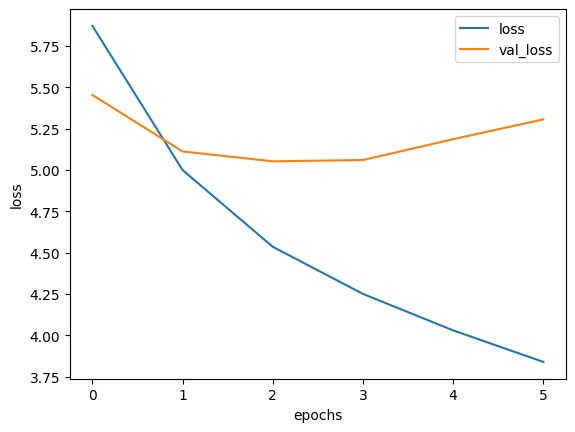

In [ ]:
for label in ['loss','val_loss']:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
def extract_substring(input_string):
    start_marker = "startseq"
    end_marker = "endseq"

    start_index = input_string.find(start_marker)
    end_index = input_string.find(end_marker)

    if start_index != -1 and end_index != -1 and end_index > start_index:
        extracted_string = input_string[start_index + len(start_marker):end_index]
        return extracted_string.strip()
    else:
        return ""

## Generating captions

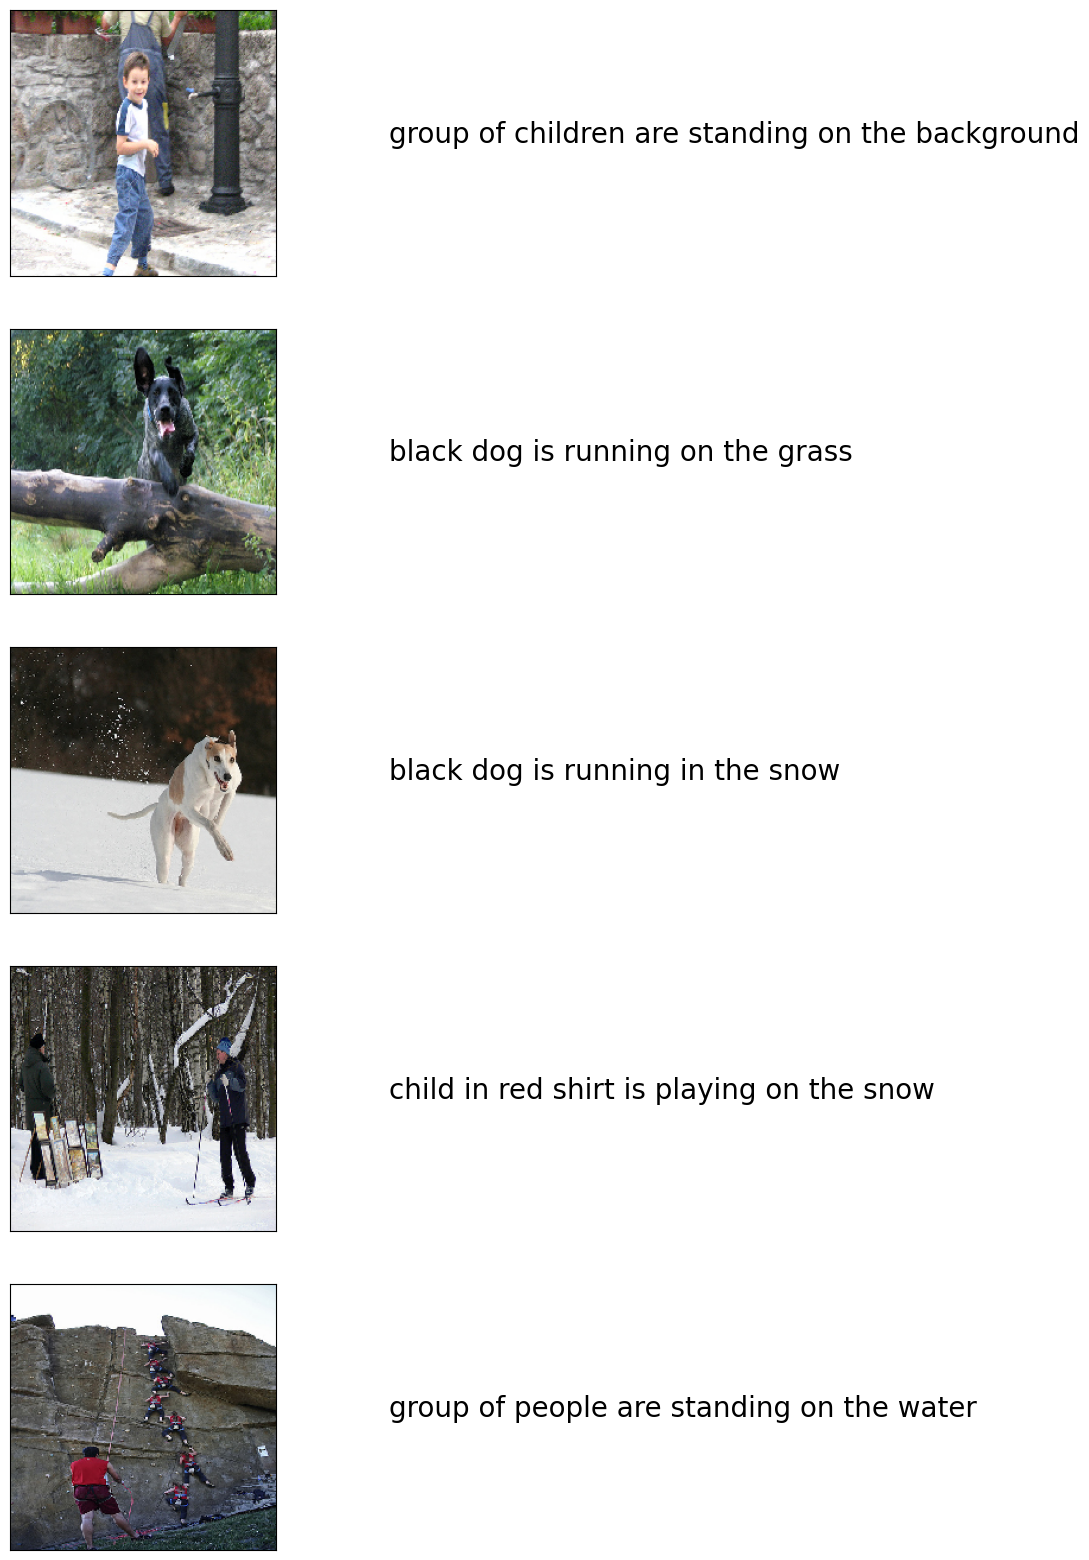

In [ ]:
index_word = dict([(index,word) for word,index in tokenizer.word_index.items()])

def predict_caption(image):
    in_text = 'startseq'

    for iword in range(maxLen):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence],maxLen)
        yhat=model.predict([image,sequence],verbose=0)
        yhat = np.argmax(yhat)
        newword=index_word[yhat]
        in_text +=' '+newword
        if newword =='endseq':
            break
    return (in_text)

npix = 224
npic = 5
target_size = (npix,npix,3)
count =1

fig= plt.figure(figsize=(10,20))
for jpgfnm,image_feature in zip(fnm_test[8:13],di_test[8:13]):
    filename = Flickr_jpg+'/'+jpgfnm
    image_load = load_img(filename,target_size=target_size)
    ax=fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count+=1

    caption = predict_caption(image_feature.reshape(1,len(image_feature)))
    caption = extract_substring(caption)
    ax= fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0,0.5,caption,fontsize=20)
    count+=1

plt.show()